***
# Titanic Machine learning from Disaster
***

## Here we attempt to predict survival rate of the passengers using Logistic Regression and Random Forest classifier
***

### The dataset contains details of passengers aboard the titanic.
This dataset is obtained from [Kaggle](https://www.kaggle.com/c/titanic/overview)
***

In [1]:
# Importing necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading csv file of the titanic dataset
data = pd.read_csv('/Users/sriramsureshkumar/Desktop/CSV files/titanic/train.csv')

In [3]:
# Checking a few rows of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***
## Exploratory data analysis
***

In [6]:
sns.set_style('whitegrid')

/Users/sriramsureshkumar/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/sriramsureshkumar/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

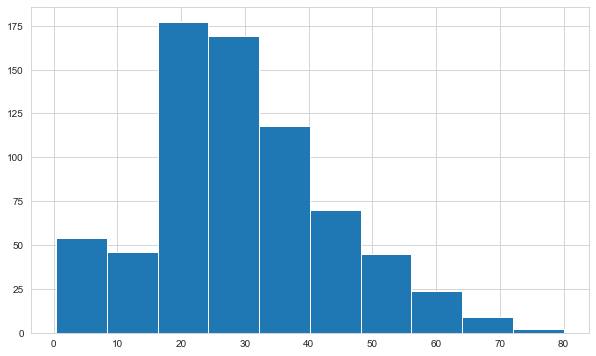

In [7]:
plt.figure(figsize=(10,6))
plt.hist(data['Age'])

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

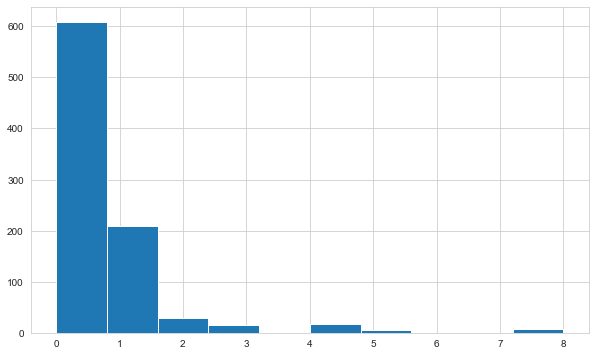

In [8]:
plt.figure(figsize=(10,6))
plt.hist(data['SibSp'])

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

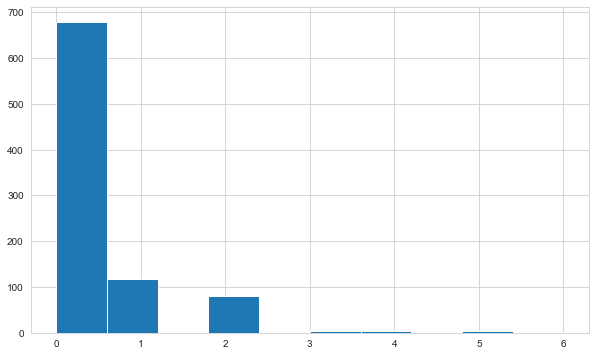

In [9]:
plt.figure(figsize=(10,6))
plt.hist(data['Parch'])

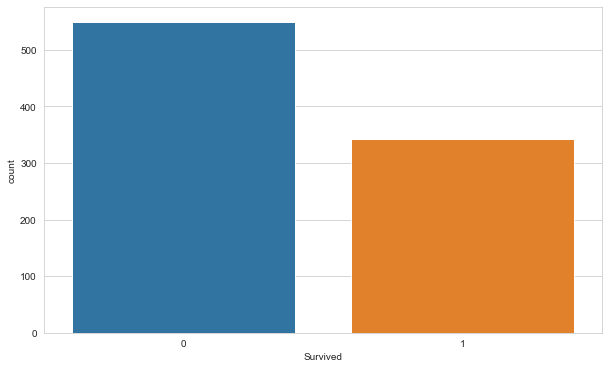

In [10]:
# How many people survived?
plt.figure(figsize=(10,6))
sns.countplot(data['Survived'])

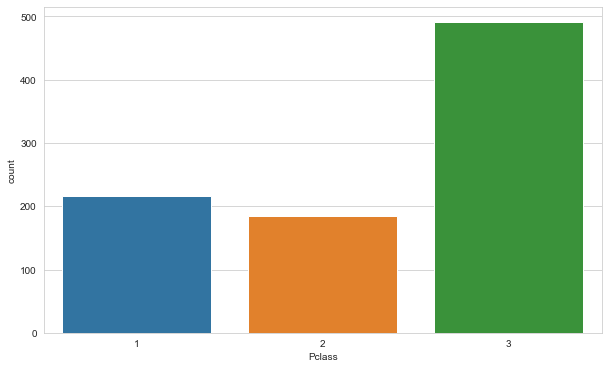

In [11]:
# No. of passengers in each class
plt.figure(figsize=(10,6))
sns.countplot(data['Pclass'])

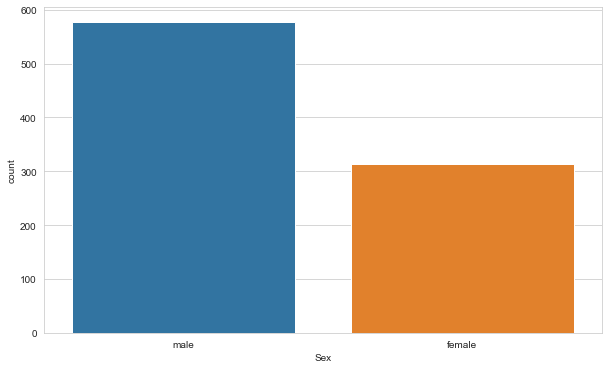

In [12]:
# No. of male and female passengers
plt.figure(figsize=(10,6))
sns.countplot(data['Sex'])

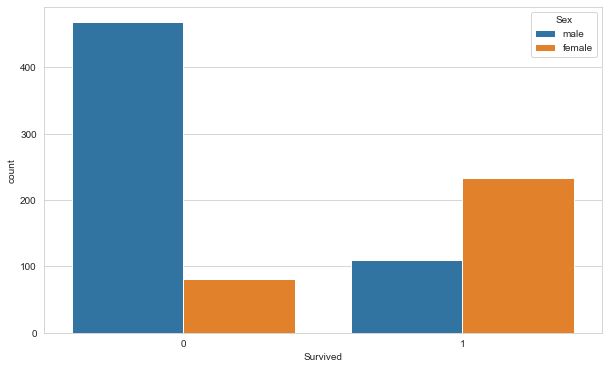

In [13]:
# Checking whether gender affected survival rate
plt.figure(figsize=(10,6))
sns.countplot(data['Survived'], hue=data['Sex'])

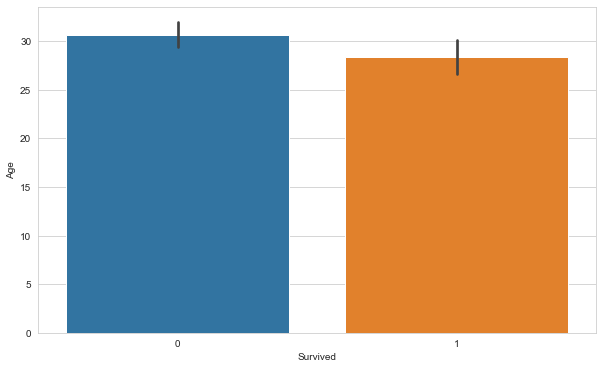

In [14]:
# Average age of people who survived and who didn't
plt.figure(figsize=(10,6))
sns.barplot(x='Survived', y='Age', data=data)

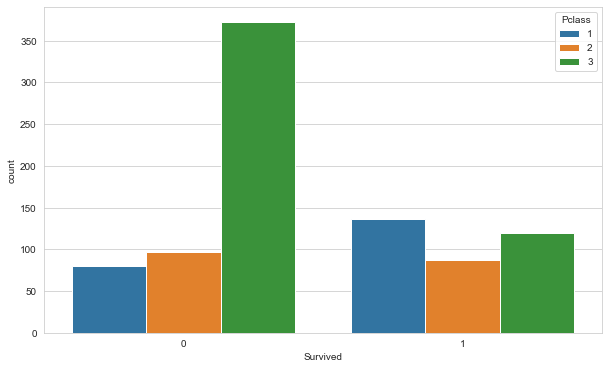

In [15]:
# Did class of ticket affect survival rate?
plt.figure(figsize=(10,6))
sns.countplot(data['Survived'], hue=data['Pclass'])

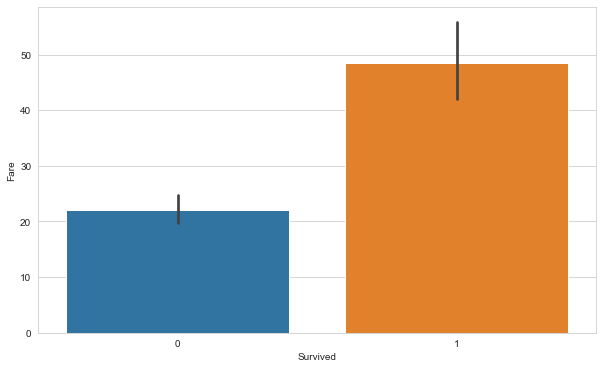

In [16]:
# Average fare price of passengers who survived and who didn't
plt.figure(figsize=(10,6))
sns.barplot(x='Survived', y='Fare', data=data)

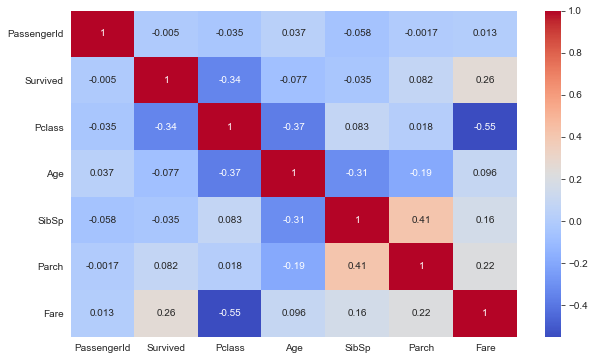

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

***
## Data Cleaning
***

In [18]:
# Checking rows with missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
#Embarked has only 2 missing values, let's check out values in Embarked
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
#Since overwhelming of them are 'S' we'll fill the 2 missing values with 'S'
data['Embarked'].fillna('S', inplace=True)

In [21]:
# Cabin column has way too much missing values to be of any use
data.drop('Cabin', axis=1, inplace=True)

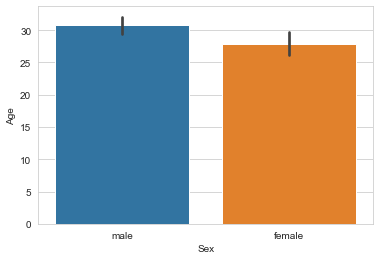

In [22]:
sns.barplot(x='Sex', y='Age', data=data)

In [23]:
pd.DataFrame(data.groupby('Sex')['Age'].mean())

,Age
Sex,
female,27.915709
male,30.726645


In [24]:
def fillna(col):
    if pd.isnull(col[0]):
       if col[1] == 'male':
           return 31
       elif col[1] == 'female':
           return 28
    else:
       return col[0]

In [25]:
data['Age'] = data[['Age','Sex']].apply(fillna, axis=1)

In [26]:
# We'll need to convert categorical columns to 1's and 0's
data['Sex'] = pd.get_dummies(data['Sex'], drop_first=True)
data['Embarked'] = pd.get_dummies(data['Embarked'], drop_first=True)

In [27]:
# Dropping name and ticket details, assuming they don't really affect survival rate
#Also dropping passenger id since they are really just the serial no.
data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [28]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


***
## Machine learning model
***

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
model1 = LogisticRegression()
model2 = RandomForestClassifier(n_estimators=200)
model3 = DecisionTreeClassifier()

In [33]:
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
model3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
pred1 = model1.predict(X_test)

In [37]:
pred2 = model2.predict(X_test)

In [38]:
pred3 = model3.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print('Logistic Regression model result:', '\n', classification_report(y_test,pred1))
print('\n')
print('Logistic Regression model result:', '\n', confusion_matrix(y_test,pred1))

Logistic Regression model result: 
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       149
           1       0.83      0.67      0.74       119

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.79      0.79       268



Logistic Regression model result: 
 [[133  16]
 [ 39  80]]


In [41]:
print('Random Forest Classifier result:', '\n', classification_report(y_test,pred2))
print('\n')
print('Random Forest Classifier result:', '\n', confusion_matrix(y_test,pred2))

Random Forest Classifier result: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       149
           1       0.85      0.77      0.81       119

    accuracy                           0.84       268
   macro avg       0.84      0.83      0.84       268
weighted avg       0.84      0.84      0.84       268



Random Forest Classifier result: 
 [[133  16]
 [ 27  92]]


In [42]:
print('Decision Tree Classifier result:', '\n', classification_report(y_test,pred3))
print('\n')
print('Decision Tree Classifier result:', '\n', confusion_matrix(y_test,pred3))

Decision Tree Classifier result: 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       149
           1       0.76      0.76      0.76       119

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



Decision Tree Classifier result: 
 [[120  29]
 [ 29  90]]


***
## Predicting results for the test dataset
***

In [43]:
test = pd.read_csv('/Users/sriramsureshkumar/Desktop/CSV files/titanic/test.csv')

In [44]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [46]:
#Data Cleaning
test.drop('Cabin', axis=1, inplace=True)
test['Age'] = test[['Age','Sex']].apply(fillna, axis=1)

In [47]:
#Since only 1 fare value is missing, we can drop that row 
test.dropna(inplace=True)

In [48]:
# Need it later for results
result_df = test[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Embarked']]

In [49]:
#Data Cleaning continued
test['Sex'] = pd.get_dummies(test['Sex'], drop_first=True)
test['Embarked'] = pd.get_dummies(test['Embarked'], drop_first=True)
test.drop(['Name', 'Ticket','PassengerId'], axis=1, inplace=True)

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    uint8  
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    uint8  
dtypes: float64(2), int64(3), uint8(2)
memory usage: 20.4 KB


In [51]:
#Using Random Forest Classifier since it had the best precision. recall and f1 score
test_pred = model2.predict(test)

In [52]:
test_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [53]:
result_df.dropna(inplace=True)

In [54]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [55]:
result_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,31.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,31.0,0,0,359309,8.0500,S


In [56]:
output = pd.DataFrame(test_pred, columns=['Survived'])

In [57]:
output

,Survived
0,0
1,0
2,0
3,1
4,0
...,...
412,0
413,1
414,0
415,0


In [58]:
result_df.reset_index(inplace=True)

In [59]:
result_df.drop('index', axis=1, inplace=True)

In [60]:
final_df = result_df.join(output)
final_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...
412,1305,3,"Spector, Mr. Woolf",male,31.0,0,0,A.5. 3236,8.0500,S,0
413,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1
414,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
415,1308,3,"Ware, Mr. Frederick",male,31.0,0,0,359309,8.0500,S,0
